In [8]:
#!pip install tqdm
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from skimage.io import imshow
import tensorflow.keras.utils as np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import layers, models
from imutils import paths
import random
import os




In [23]:
path_dataset_train = "./train"
path_dataset_test = "./test"



In [24]:


#Carrega a lista de labels
label_dict_train = {}
label_dict_test = {}
for i, d in enumerate(sorted(os.listdir(path_dataset_train))):
    label_dict_train[d] = i


for i, d in enumerate(sorted(os.listdir(path_dataset_test))):
    label_dict_test[d] = i


print(label_dict_train) # deve dar 2
print(label_dict_test) # deve dar 2


#Calcula a quantidade de classes
num_classes_train = label_dict_train




NameError: name 'path_datase_train' is not defined

In [ ]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(path_dataset)))
random.seed(42)
random.shuffle(imagePaths)
print(imagePaths)

In [12]:
labels = []
data = []

print("[INFO] loading images...")
# loop over the input images
for imagePath in tqdm(imagePaths):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    #Converts Image instance to a Numpy array
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list


    label = label_dict[imagePath.split(os.path.sep)[-4]]
    labels.append(label)

[INFO] loading images...


100%|██████████| 41553/41553 [03:43<00:00, 185.82it/s]


In [13]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(train_images, test_images, train_l, test_l) = train_test_split( data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
train_labels = np_utils.to_categorical(train_l, num_classes=num_classes)
test_labels = np_utils.to_categorical(test_l, num_classes=num_classes)

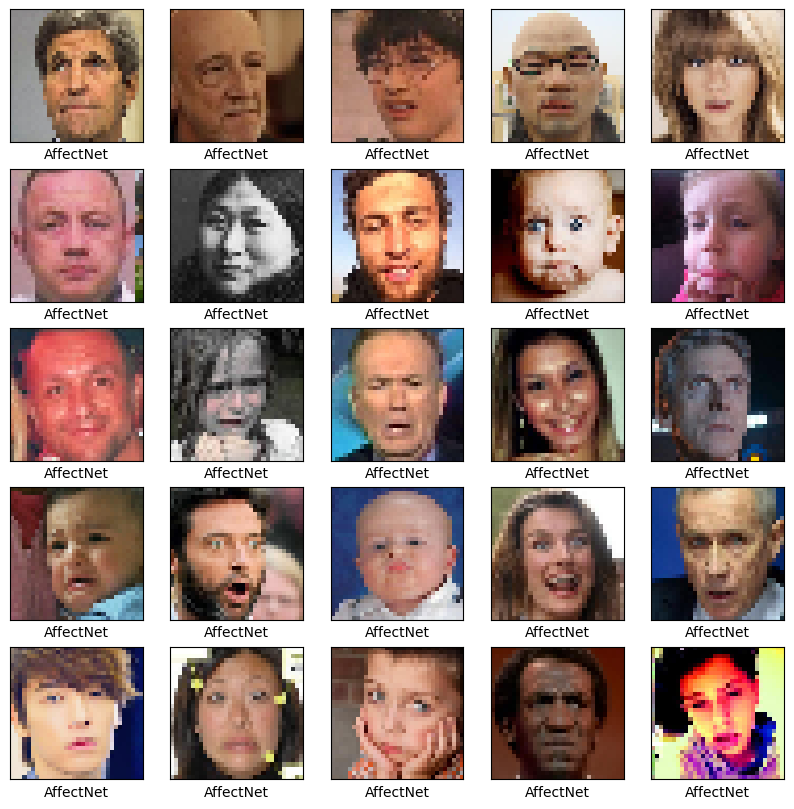

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_float32 = np.float32(train_images[i])
    plt.imshow(cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB) )
    # labels
    plt.xlabel( [k for k, v in label_dict.items() if v == train_l[i]][0] )
plt.show()

In [15]:
data.shape

(41553, 32, 32, 3)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu')) # Dense: Núm. neurônios 1a cam
model.add(layers.Dense(16, activation='relu')) # Dense: Núm. neurônios 1a cam
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_l, epochs=10, batch_size=5,
                    validation_data=(test_images, test_l))

Epoch 1/60


c:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6233/6233 [==============================] - 24s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/60
6233/6233 [==============================] - 25s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/60
6233/6233 [==============================] - 26s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/60
6233/6233 [==============================] - 25s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/60
6233/6233 [==============================] - 24s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/60
6233/6233 [==============================] - 24s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/60
6233/6233 [=======================

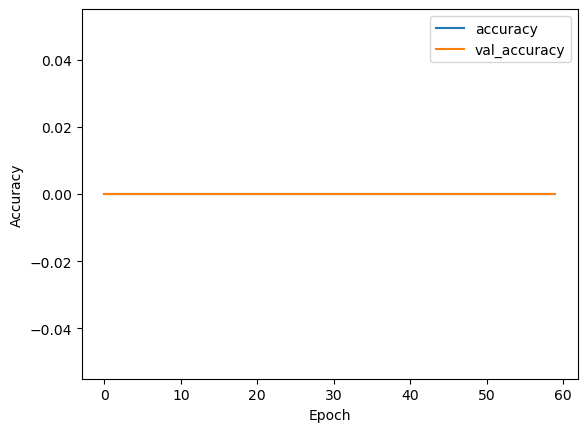

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [19]:
print("Generating test predictions...")
predict_x=model.predict(test_images)
print(np.around(predict_x, 2))

# make class predictions
predictions = (predict_x > 0.5).astype(int)

y_pred_class = np.argmax(predictions, axis=1)
y_test_class = np.argmax(test_labels, axis=1)

for i in range(len(test_labels)):
	if y_pred_class[i] == y_test_class[i]:
		print(f'\033[92m {y_pred_class[i]} (expected {y_test_class[i]})')
	else:
		print(f'\033[91m {y_pred_class[i]} (expected {y_test_class[i]})')

Generating test predictions...
325/325 [==============================] - 2s 5ms/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expected 0)
 0 (expe

In [20]:
# Avaliando a acurácia com as imagens de Teste
l = len(y_test_class)
acc = sum([y_pred_class[i]==y_test_class[i] for i in range(l)])/l
print('Accuracy: %.2f %%' % (acc*100))


Accuracy: 100.00 %


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

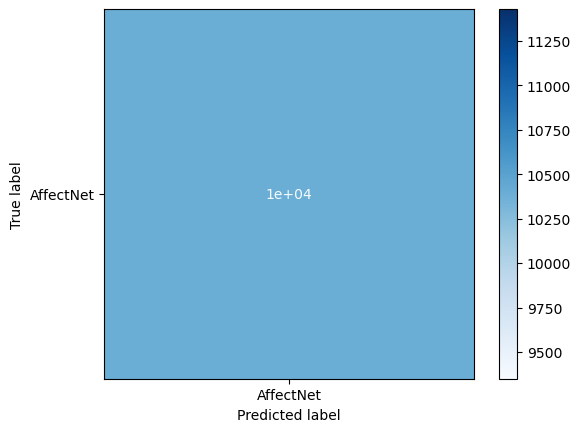

In [21]:
import matplotlib.pyplot as plt
# voltando pro formato de classes
y_pred = np.argmax(predictions, axis=1)
y_test_c = np.argmax(test_labels, axis=1)


#Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_dict)
disp.plot(cmap=plt.cm.Blues)

y_pred

In [22]:
model.save(r'/content/drive/My Drive/content/santas/abc.hdf5')

PermissionDeniedError: Failed to create a directory: /content; Permission denied